In [128]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset
To read the dataset we are going to use the function `read_csv` from the [pandas library](https://pandas.pydata.org/). In the following box the dataset is first loaded as a "dataframe" (similar to those from R), each column correspond to a variable (dimension) and each row to a point.

This dataset consist of $n=9$ __physiological and medical variables (columns)__ measured for $m=768$ __patients (rows)__

Each column represents the following variables:

+ column 0:  *Pregnancies*: Number of times pregnant
+ column 1:  *Glucose*: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
+ column 2:  *BloodPressure*: Diastolic blood pressure (mm Hg)
+ column 3:  *SkinThickness*: Triceps skin fold thickness (mm)
+ column 4:  *Insulin*: 2-Hour serum insulin (mu U/ml)
+ column 5:  *BMI*: Body mass index (weight in kg/(height in m)^2)
+ column 6:  *DiabetesPedigreeFunction*: Diabetes pedigree function
+ column 7:  *Age*: Age (years)
+ column 8:  *Outcome*: The person is diabetic or not (1 or 0)


In [129]:
import pandas as pd
dataset = pd.read_csv('diabetes.csv',header=0)

To see the first 3 lines of the dataset we use the `head` method with a parameter `3`

In [130]:
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# Description of the regression problem 

For this project, we will consider a reduced dataset with the following 5 columns as the __conditions__:
+ Pregancies
+ BloodPressure
+ SkinThinkness
+ BMI
+ Age

Let $X$ be a $m\times 5$ matrix corresponding to the values of each one of these condition variable for each patient. 

And We are going to consider the following column as our __observation__:
+ Glucose

Let $y$ be the vector of observations for each patient

### Goal (Least Squares):
Our goal is to find $c$ a vector of __parameters__ such that:
$$X\cdot c +r = y \quad \text{and}\quad ||r||_2 \text{ is minimized }$$

### Construction of $X$ and $y$
In the following box we construct our matrix $X$ and vector $y$ as `np.array`, so you do not need to bother understanding the structure of the dataframe. 


In [208]:
# Get only the requiered variables
dataset_X = dataset[["Pregnancies",
                    "BloodPressure",
                    "SkinThickness",
                    "BMI",
                    "Age"]]
# Get only the observation variable
dataset_y = dataset["Glucose"]
# Get only np.array out of the dataset
X = dataset_X.values
y = dataset_y.values

In [211]:
print("type of X: ",type(X))
print("shape of X: ",X.shape)
print("type of y: ",type(y))
print("shape of y: ",y.shape)

type of X:  <class 'numpy.ndarray'>
shape of X:  (768, 5)
type of y:  <class 'numpy.ndarray'>
shape of y:  (768,)


# Questions
+ 1) Plot $y$ as a function of the values of each column of $X$
+ 2) Compute a $QR$ factorization of $X$
+ 3) Use the factorization to compute the vector $c$
+ 4) Plot $y$ and the regression $X\cdot c$, as a function of the values of each column of $X$
+ 5) Apply the SVD to $X = \hat U \Sigma V^*$
+ 6) Represent the points in the plane defined by the two first column vectors of $V$.
+ 7) Represent the projection of the canonical axis in this plane

## 1) Plot the data

Text(0, 0.5, 'Glucose')

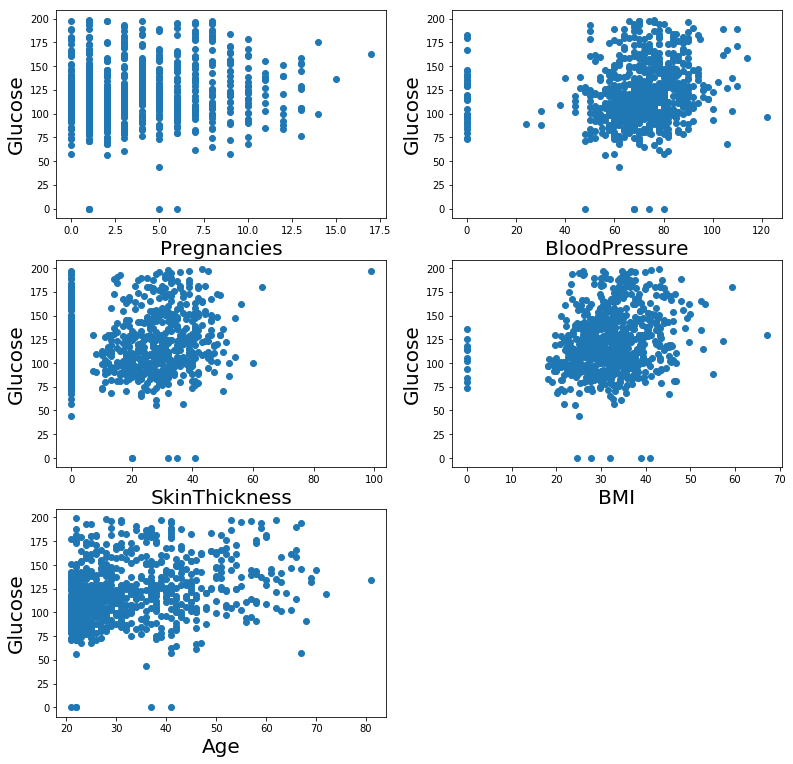

In [212]:
plt.figure(1,figsize=(13,13))
# Plot Glucose vs Pregnancies
plt.subplot(321)
plt.plot(X[:,0], y, "o")
plt.xlabel("Pregnancies", fontsize=20)
plt.ylabel("Glucose", fontsize=20)
# Plot Glucose vs BloodPressure
plt.subplot(322)
plt.plot(X[:,1], y, "o")
plt.xlabel("BloodPressure", fontsize=20)
plt.ylabel("Glucose", fontsize=20)
# Plot Glucose vs BloodPressure
plt.subplot(323)
plt.plot(X[:,2], y, "o")
plt.xlabel("SkinThickness", fontsize=20)
plt.ylabel("Glucose", fontsize=20)
# Plot Glucose vs Glucose
plt.subplot(324)
plt.plot(X[:,3], y, "o")
plt.xlabel("BMI", fontsize=20)
plt.ylabel("Glucose", fontsize=20)
# Plot Glucose vs Age
plt.subplot(325)
plt.plot(X[:,4], y, "o")
plt.xlabel("Age", fontsize=20)
plt.ylabel("Glucose", fontsize=20)


## 2) Compute QR factorization

In [213]:
Q,R = np.linalg.qr(X)

In [214]:
Q.shape,R.shape

((768, 5), (5, 5))

R is upper triangular matrix

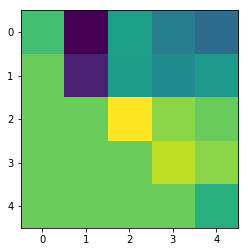

In [215]:
plt.imshow(R)

Q is a orthonormal matrix

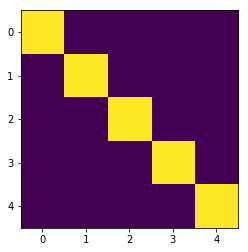

In [216]:
plt.imshow(Q.T.dot(Q))

## 3) Compute parameter vector $c$ solving the least-squares equation
$X^* X c = X^* y$ (normal equation) and $X = QR$ (QR factorization)

Then: $(QR)^*(QR) c = (QR)^* y$

$R^* Q^* Q R c = R^* Q^* y$

$R^* R c = R^* Q^* y$

If $X$ is full rank then $R$ is invertible

$Rc = Q^* y$

$c = R^{-1} Q^* y$

In [217]:
c = np.linalg.inv(R).dot(Q.T).dot(y)

In [218]:
print(c)

[-0.60676759  0.3219836  -0.04742801  1.86698339  1.19918515]


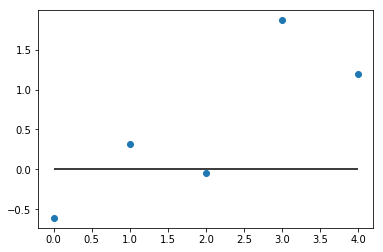

In [219]:
plt.plot(c,"o")
plt.hlines(0,xmin=0,xmax=4)

### Some Interpretation 
##### Recall of the variables:
+ 0: Pregancies
+ 1: BloodPressure
+ 2: SkinThinkness
+ 3: BMI
+ 4: Age

What happens if an individual increases his BMI of one unit? The regression tells you that his glucose level should increase by 1.866

What happens if an individual get 1 year older? The regression tells you that his glucose level should increase by 1.199

If the skin thickness increases, then the impact in the glucose level is very low (-0.047)

...

Keep in mind that this is not reality, this is just a regression model, and we did not even checked the statistical validity of these results (out of the scope of this lecture)

Compute the regression $X\cdot c$

In [220]:
Xc = X.dot(c)

## 4) Plot $y$ and $Xc$ as a function of each variable in $X$

Text(0, 0.5, 'Glucose')

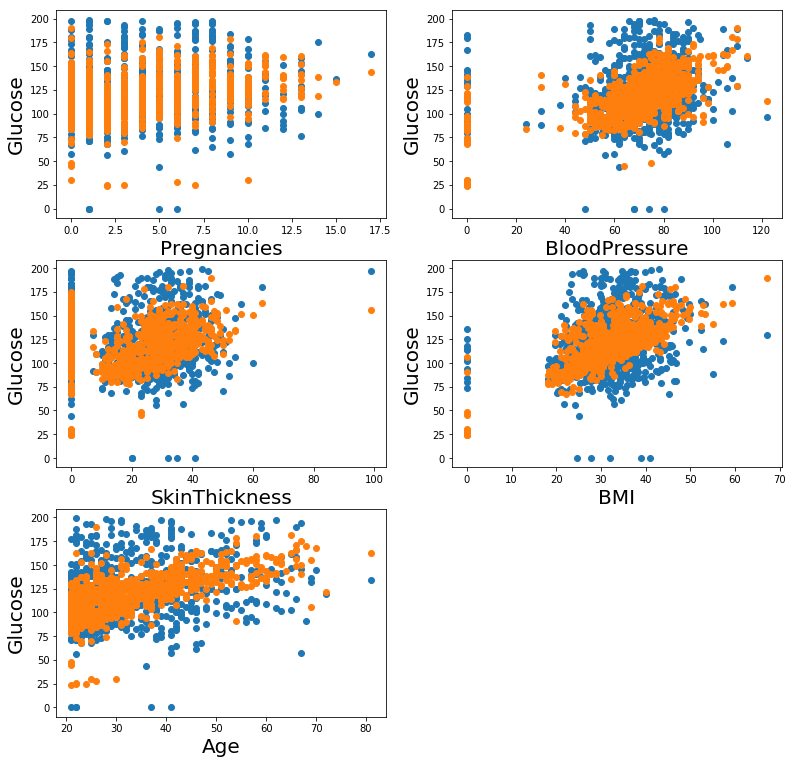

In [221]:
plt.figure(1,figsize=(13,13))
# Plot Glucose vs Pregnancies
plt.subplot(321)
plt.plot(X[:,0], y, "o")
plt.plot(X[:,0], Xc, "o")
plt.xlabel("Pregnancies", fontsize=20)
plt.ylabel("Glucose", fontsize=20)
# Plot Glucose vs BloodPressure
plt.subplot(322)
plt.plot(X[:,1], y, "o")
plt.plot(X[:,1], Xc, "o")
plt.xlabel("BloodPressure", fontsize=20)
plt.ylabel("Glucose", fontsize=20)
# Plot Glucose vs BloodPressure
plt.subplot(323)
plt.plot(X[:,2], y, "o")
plt.plot(X[:,2], Xc, "o")
plt.xlabel("SkinThickness", fontsize=20)
plt.ylabel("Glucose", fontsize=20)
# Plot Glucose vs Glucose
plt.subplot(324)
plt.plot(X[:,3], y, "o")
plt.plot(X[:,3], Xc, "o")
plt.xlabel("BMI", fontsize=20)
plt.ylabel("Glucose", fontsize=20)
# Plot Glucose vs Age
plt.subplot(325)
plt.plot(X[:,4], y, "o")
plt.plot(X[:,4], Xc, "o")
plt.xlabel("Age", fontsize=20)
plt.ylabel("Glucose", fontsize=20)


## 5) Apply SVD to $X$

In [250]:
U,s,Vt = np.linalg.svd(X,full_matrices=False)
V = Vt

In [251]:
X_.mean(axis=0)

array([-6.47630098e-17,  1.50342701e-17,  1.00613962e-16,  2.59052039e-16,
        1.93132547e-16])

Compute the STD along each principal axis

In [252]:
variances = s/(X.shape[0]-1)

Compute the % of STD carried by each principal axis

In [253]:
variances_percent = variances / sum(variances)

In [254]:
variances_percent*100

array([69.64783151, 12.55796676,  9.28703089,  6.28474808,  2.22242276])

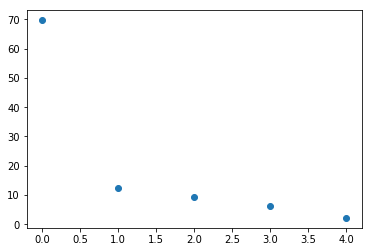

In [255]:
plt.plot(variances_percent*100,"o")

## 6) Represent the points in the plane defined by the two first vector columns of $V$ 


In [256]:
X_principal = X.dot(V[:,:2])

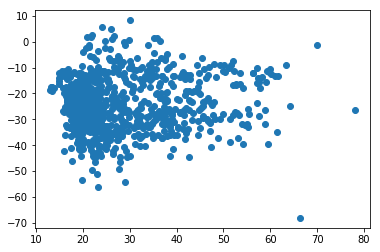

In [257]:
plt.plot(X_principal[:,0],X_principal[:,1],"o")

## 7) Represent the canonical axis in the plane defined by the two first vector columns of $V$

In [258]:
map_cannonical = np.eye(5).dot(V).T[:,:2]

(-1, 1)

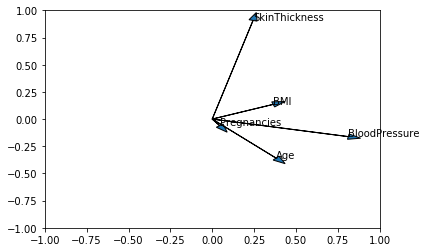

In [259]:
plt.arrow(0,0,*map_cannonical[0,:],head_width=0.05)
plt.arrow(0,0,*map_cannonical[1,:],head_width=0.05)
plt.arrow(0,0,*map_cannonical[2,:],head_width=0.05)
plt.arrow(0,0,*map_cannonical[3,:],head_width=0.05)
plt.arrow(0,0,*map_cannonical[4,:],head_width=0.05)
plt.text(x=map_cannonical[0,0],y=map_cannonical[0,1],s = "Pregnancies")
plt.text(x=map_cannonical[1,0],y=map_cannonical[1,1],s = "BloodPressure")
plt.text(x=map_cannonical[2,0],y=map_cannonical[2,1],s = "SkinThickness")
plt.text(x=map_cannonical[3,0],y=map_cannonical[3,1],s = "BMI")
plt.text(x=map_cannonical[4,0],y=map_cannonical[4,1],s = "Age")
plt.xlim([-1,1])
plt.ylim([-1,1])
